## Limits on Heavy Neutrinos

This notebook plots the standard parameter space of heavy neutrinos under the assumption of single flavor dominance.

The data is pulled from the Google Sheets url, and limits are drawn from digitized or shared data.

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
from Nlimits import plot_tools
from Nlimits import hnl_tools


In [25]:
case_electron = hnl_tools.limits(flavor='e', invisible=False)
case_muon = hnl_tools.limits(flavor='mu', invisible=False)
case_tau = hnl_tools.limits(flavor='tau', invisible=False)

background_grey = plot_tools.lighten_color('lightgrey', 0.3)

x=np.geomspace(1,1e5,100000)


## $|U_{e N}|^2$

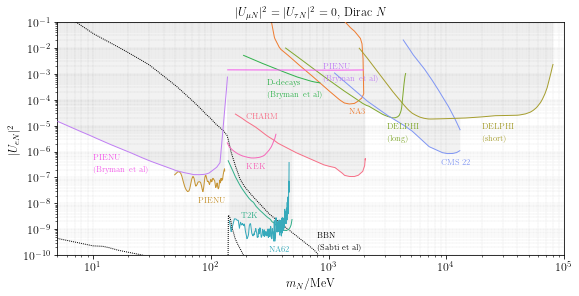

In [26]:
case = case_electron

fig, ax = plot_tools.std_fig(figsize=(8,4), ax_form=[0.1,0.125,0.88,0.81])

clrs = sns.color_palette('husl', n_colors=len(list(case.limits.iterrows())))  # a list of RGB tuples
color_dic = dict(zip(case.limits['id'], clrs))
color_dic['bbn'] = 'black'

dash_dic = dict(zip(case.limits['id'], len(clrs)*[(1,0)]))
dash_dic['bbn'] = (1,1)

labelpos_dic={}
for i, limit in case.limits.iterrows():
    ilabel, ival = np.nanargmin(limit.interp_func(x)), np.nanmin(limit.interp_func(x))
    labelpos_dic[limit.id] = (x[ilabel]*0.9, ival/2.5)

labelpos_dic['bbn'] = (800, 5e-10)
labelpos_dic['t2k'] = (180, 3e-9)
labelpos_dic['na3'] = (1500, 3e-5)
labelpos_dic['charm'] = (200, 2e-5)
labelpos_dic['delphi_short'] = (2e4, 8e-6)
labelpos_dic['pienu_lowmass'] = (900, 1.6e-3)
labelpos_dic['pienu_highmass'] = (10, 0.5e-6)
labelpos_dic['de2_bryman_shrock'] = (300, 4e-4)

for i, limit in case.limits.iterrows():
    c = color_dic[limit.id]
    dash = dash_dic[limit.id]
    label = fr'\noindent {limit.plot_label}'
    ax.plot(x, limit.interp_func(x), zorder=3, color=c, dashes=dash, lw=1)
    ax.plot(x, limit.interp_func_top(x), color=c, dashes=dash,zorder=2, lw=1)
    if 'bbn' not in limit.id:
        ax.fill_between(x, limit.interp_func(x), x/x,  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
        # ax.fill_between(x, limit.interp_func(x), limit.interp_func_top(x),  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
    t = ax.annotate(label, xy=labelpos_dic[limit.id], xycoords='data', color=c, zorder=4, fontsize=8)
    # t.set_bbox(dict(facecolor=background_grey, alpha=0.2, edgecolor='None'))

ax.set_yscale("log")
ax.set_xscale("log")


ax.set_ylabel(fr"{case.latexflavor}")
ax.set_xlabel(fr"$m_N/$MeV")

major=np.array([1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])
minor=np.array([2,3,4,5,6,7,8,9])
minor = np.array([m*minor for m in major]).flatten()[:-9]
ax.set_yticks(major)
ax.set_yticks(minor, minor=True)

ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.25,c='black',lw=0.2)
ax.grid(axis='x', which='both',dashes=(6,1),alpha=0.25,c='black',lw=0.2)

ax.set_ylim(1e-10,1e-1)
ax.set_xlim(5,1e5)


ax.set_title(fr"$|U_{{\mu N}}|^2 = |U_{{\tau N}}|^2 = 0$, Dirac $N$")
plot_tools.std_savefig(fig, path = f'plots/U{case.flavor}N.pdf')

## $|U_{\mu N}|^2$

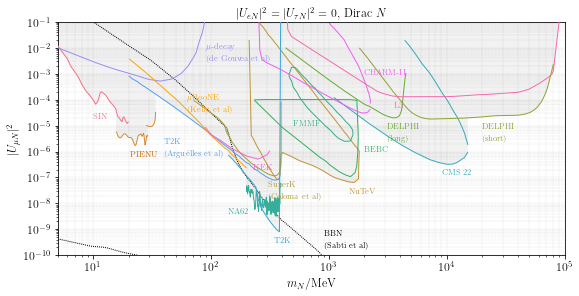

In [27]:
case = case_muon

fig, ax = plot_tools.std_fig(figsize=(8,4), ax_form=[0.1,0.125,0.88,0.81])

# sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=len(list(case.limits.iterrows()))) # a list of RGB tuples
color_dic = dict(zip(case.limits['id'], clrs))
color_dic['bbn'] = 'black'
color_dic['microboone_higgs'] = 'orange'

dash_dic = dict(zip(case.limits['id'], len(clrs)*[(1,0)]))
dash_dic['bbn'] = (1,1)

labelpos_dic={}
for i, limit in case.limits.iterrows():
    ilabel, ival = np.nanargmin(limit.interp_func(x)), np.nanmin(limit.interp_func(x))
    labelpos_dic[limit.id] = (x[ilabel]*0.9, ival/2.5)
labelpos_dic['bbn'] = (900, 6e-10)
labelpos_dic['muon_decays'] = (90, 1e-2)
# labelpos_dic['borexino_plestid'] = (5,2e-2)
labelpos_dic['t2k_lowmass'] = (40,2e-6)
labelpos_dic['sin'] = (10, 2e-5)
labelpos_dic['charmii'] = (2e3, 1e-3)
labelpos_dic['fmmf'] = (500, 1e-5)
labelpos_dic['bebc'] = (2e3, 1e-6)
labelpos_dic['na62'] = (140, 4e-9)
labelpos_dic['delphi_short'] = (2e4, 8e-6)
labelpos_dic['lepton_universality'] = (1e4, 5e-4)
labelpos_dic['ewpo'] = (1e4, 2e-3)
labelpos_dic['microboone_higgs'] = (63, 1e-4)


for i, limit in case.limits.iterrows():
    c = color_dic[limit.id]
    dash = dash_dic[limit.id]
    label = fr'\noindent {limit.plot_label}'
    ax.plot(x, limit.interp_func(x), zorder=3, color=c, dashes=dash, lw=1)
    ax.plot(x, limit.interp_func_top(x), color=c, dashes=dash,zorder=2, lw=1)
    if 'bbn' not in limit.id:
        ax.fill_between(x, limit.interp_func(x), x/x,  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
        # ax.fill_between(x, limit.interp_func(x), limit.interp_func_top(x),  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
    t = ax.annotate(label, xy=labelpos_dic[limit.id], xycoords='data', color=c, zorder=4, fontsize=8)
    # t.set_bbox(dict(facecolor=background_grey, alpha=0.2, edgecolor='None'))

ax.set_yscale("log")
ax.set_xscale("log")


ax.set_ylabel(fr"{case.latexflavor}")
ax.set_xlabel(fr"$m_N/$MeV")

major=np.array([1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])
minor=np.array([2,3,4,5,6,7,8,9])
minor = np.array([m*minor for m in major]).flatten()[:-9]
ax.set_yticks(major)
ax.set_yticks(minor, minor=True)

ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.25,c='black',lw=0.2)
ax.grid(axis='x', which='both',dashes=(6,1),alpha=0.25,c='black',lw=0.2)

ax.set_ylim(1e-10,1e-1)
ax.set_xlim(5,1e5)
ax.set_title(fr"$|U_{{e N}}|^2 = |U_{{\tau N}}|^2 = 0$, Dirac $N$")

plot_tools.std_savefig(fig, path = f'plots/U{case.flavor}N.pdf')

## $|U_{\tau N}|^2$

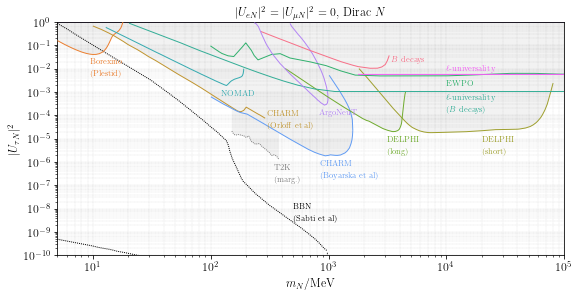

In [28]:
case = case_tau
fig, ax = plot_tools.std_fig(figsize=(8,4), ax_form=[0.1,0.125,0.88,0.81])

# sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=len(list(case.limits.iterrows())))  # a list of RGB tuples
color_dic = dict(zip(case.limits['id'], clrs))
color_dic['t2k'] = 'grey'
color_dic['bbn'] = 'black'

dash_dic = dict(zip(case.limits['id'], len(clrs)*[(1,0)]))
dash_dic['bbn'] = (1,1)
dash_dic['t2k'] = (1,1)

labelpos_dic={}
for i, limit in case.limits.iterrows():
    ilabel, ival = np.nanargmin(limit.interp_func(x)), np.nanmin(limit.interp_func(x))
    labelpos_dic[limit.id] = (x[ilabel]*0.9, ival/2.5)
labelpos_dic['bbn'] = (500, 1e-8)
labelpos_dic['charm'] = (300, 1e-4)
# labelpos_dic['borexino_plestid'] = (5,2e-2)
labelpos_dic['lepton_universality_2'] = (1e4,8e-3)
labelpos_dic['b_decays'] = (3.4e3, 2e-2)
labelpos_dic['delphi_short'] = (2e4, 8e-6)
labelpos_dic['lepton_universality'] = (1e4, 5e-4)
labelpos_dic['ewpo'] = (1e4, 2e-3)


for i, limit in case.limits.iterrows():
    c = color_dic[limit.id]
    dash = dash_dic[limit.id]
    label = fr'\noindent {limit.plot_label}'
    ax.plot(x, limit.interp_func(x), zorder=3, color=c, dashes=dash, lw=1)
    ax.plot(x, limit.interp_func_top(x), color=c, dashes=dash,zorder=2, lw=1)
    if 'bbn' not in limit.id:
        ax.fill_between(x, limit.interp_func(x), x/x,  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
        # ax.fill_between(x, limit.interp_func(x), limit.interp_func_top(x),  zorder=1, facecolor=background_grey, edgecolor='None', alpha=1)    
    t = ax.annotate(label, xy=labelpos_dic[limit.id], xycoords='data', color=c, zorder=4, fontsize=8)
    # t.set_bbox(dict(facecolor=background_grey, alpha=0.2, edgecolor='None'))

ax.set_yscale("log")
ax.set_xscale("log")


ax.set_ylabel(fr"{case.latexflavor}")
ax.set_xlabel(fr"$m_N/$MeV")

major=np.array([1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])
minor=np.array([2,3,4,5,6,7,8,9])
minor = np.array([m*minor for m in major]).flatten()[:-9]
ax.set_yticks(major)
ax.set_yticks(minor, minor=True)

ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.25,c='black',lw=0.2)
ax.grid(axis='x', which='both',dashes=(6,1),alpha=0.25,c='black',lw=0.2)

ax.set_ylim(1e-10,1)
ax.set_xlim(5,1e5)
ax.set_title(fr"$|U_{{e N}}|^2 = |U_{{\mu N}}|^2 = 0$, Dirac $N$")

plot_tools.std_savefig(fig, path = f'plots/U{case.flavor}N.pdf')

In [29]:
import pylatex
from pylatex import Document, Section, Subsection, Command
from pylatex.utils import italic, NoEscape


def add_plot(doc, case):

    # caption with the citations
    citations = fr"Constraints on {case.latexflavor} as a function of the HNL mass $m_N$. Limits shown: "
    names = sorted(case.limits.plot_label)
    for name in names:
        citations += fr'{name}~\cite{{{list(case.limits.reference[case.limits.plot_label == name])[0]}}}, '.replace('\\\\','')
    citations = citations[:-2]+'.'

    # figure
    with doc.create(pylatex.Figure(position='h!')) as latexfig:
        latexfig.add_image(f'../plots/U{case.flavor}N.pdf', width=NoEscape(r'1\textwidth'))
        latexfig.add_caption(NoEscape(citations))


# Basic document
doc = Document('pylatex/article', documentclass=NoEscape(r'revtex4-2'))
add_plot(doc, case_electron)
add_plot(doc, case_muon)
add_plot(doc, case_tau)

doc.append(pylatex.Command('bibliographystyle', arguments=NoEscape(r'apsrev4-1')))
doc.append(pylatex.Command('bibliography', arguments='article'))

doc.generate_pdf(clean_tex=False)
doc.generate_tex()